### Credit Card Anomaly Detection
### Michae14

#### This assignment is the continued part of the EDA assignment, I will use the 15 features I created in that Assignment. Here are the details of the 15 feature engineering column:
   - 3.1. Feature 1: The ratio to average amount by merchant
   - 3.2. Feature 2: The ratio to median amount by merchant
   - 3.3. Feature 3: The ratio to average amount by merchant and month
   - 3.4. Feature 4: The ratio to median amount by merchant and month
   - 3.5. Feature 5: The ratio to average amount by merchant and day of week
   - 3.6. Feature 6: The ratio to average amount by vendor
   - 3.7. Feature 7: The ratio to median amount by vendor
   - 3.8. Feature 8: The ratio to average amount by vendor and month
   - 3.9. Feature 9: The ratio to median amount by vendor and month
   - 3.10. Feature 10: The ratio to average amount by merchant and day of week
   - 3.11. Feature 11: The ratio to average amount by cardholder and merchant
   - 3.12. Feature 12: The ratio to median amount by cardholder and merchant
   - 3.13. Feature 13: The ratio to average amount by cardholder, merchant, and month
   - 3.14. Feature 14: The ratio to median amount by cardholder, merchant, and month
   - 3.15. Feature 15: The ratio to average amount by cardholder, merchant, and day of week

#### There are 3 major logic when I create the 15 columns above. 

The first logic is to to detect whether the cardholder abuse the credit card based on the comparision of his agency and merchant category. If one cardholders spend much higher money than the average money other cardholders spent in his agency, it might indicate there is a problem in this transaction. 

The second logic is to group by the agency and vendor, detecting whether the abuse the credit card based on the comparision of his agency and vendor. The column 'Vendor' suggest that where the cardholder make the purchase and buy the service. For example, we can look the average or median amount of the spending in specfic vendor like Walmart or Sheraton Hotel and make the comparison. Sometimes, the average spending amount in Sheraton might be more expensive than other hotel due to the different level of the hotel services and experience.

THe third logic is to group by the agency and cardholder. In the dataset, there is more than 1 cardholder under one agency, and each cardholder might be responsible for purchase items or services for a specific category. So, this logic is to detect the outliners by the average amount the cardholders spend on a specific merchant category. If the ratio to average or median is too high, it might suggest there mgight be an anomaly for that record.

In [49]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pyod.models.hbos import HBOS

In [50]:
# Import the Dataset
df = pd.read_csv('Credit Card Assignment Data.csv')

In [51]:
df.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,...,agency_vendor_avg_ratio_amount,agency_vendor_median_ratio_amount,agency_vendor_month_avg_ratio_amount,agency_vendor_month_median_ratio_amount,agency_vendor_day_avg_ratio_amount,agency_merchant_cardholder_avg_ratio_amount,agency_merchant_cardholder_median_ratio_amount,agency_merchant_cardholder_month_avg_ratio_amount,agency_merchant_cardholder_month_median_ratio_amount,agency_merchant_cardholder_day_avg_ratio_amount
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.000000,NACAS,2013-07-30,2013-07-31,...,1.243789,1.318519,1.135566,1.000000,1.233256,1.000000,1.000000,1.000000,1.000000,1.000000
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.960000,SHERATON HOTEL,2013-07-30,2013-07-31,...,0.781845,1.795426,1.064881,1.064881,1.032701,1.435311,1.138765,0.784342,0.853600,2.198382
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.820000,SEARS.COM 9300,2013-07-29,2013-07-31,...,1.801787,6.380146,1.000000,1.000000,1.495491,2.106319,2.106319,1.000000,1.000000,1.000000
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.390000,WAL-MART #0137,2013-07-30,2013-07-31,...,1.544294,2.710249,1.593246,2.686455,1.630422,1.898048,1.935931,1.000000,1.000000,1.000000
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.960000,STAPLES DIRECT,2013-07-30,2013-07-31,...,0.876658,1.682158,0.755700,1.078748,1.124295,1.938502,2.287686,1.529105,1.529105,1.529105


In [52]:
selected_columns = ['agency_merchant_avg_ratio_amount',
       'agency_merchant_median_ratio_amount',
       'agency_merchant_month_avg_ratio_amount',
       'agency_merchant_month_median_ratio_amount',
       'agency_merchant_day_avg_ratio_amount',
       'agency_vendor_avg_ratio_amount', 'agency_vendor_median_ratio_amount',
       'agency_vendor_month_avg_ratio_amount',
       'agency_vendor_month_median_ratio_amount',
       'agency_vendor_day_avg_ratio_amount',
       'agency_merchant_cardholder_avg_ratio_amount',
       'agency_merchant_cardholder_median_ratio_amount',
       'agency_merchant_cardholder_month_avg_ratio_amount',
       'agency_merchant_cardholder_month_median_ratio_amount',
       'agency_merchant_cardholder_day_avg_ratio_amount']

final_df = df[selected_columns]

In [53]:
final_df.head()

,agency_merchant_avg_ratio_amount,agency_merchant_median_ratio_amount,agency_merchant_month_avg_ratio_amount,agency_merchant_month_median_ratio_amount,agency_merchant_day_avg_ratio_amount,agency_vendor_avg_ratio_amount,agency_vendor_median_ratio_amount,agency_vendor_month_avg_ratio_amount,agency_vendor_month_median_ratio_amount,agency_vendor_day_avg_ratio_amount,agency_merchant_cardholder_avg_ratio_amount,agency_merchant_cardholder_median_ratio_amount,agency_merchant_cardholder_month_avg_ratio_amount,agency_merchant_cardholder_month_median_ratio_amount,agency_merchant_cardholder_day_avg_ratio_amount
0,2.081219,3.560000,1.840868,2.438356,1.978117,1.243789,1.318519,1.135566,1.000000,1.233256,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.974461,1.407761,1.015535,0.853600,0.950978,0.781845,1.795426,1.064881,1.064881,1.032701,1.435311,1.138765,0.784342,0.853600,2.198382
2,0.422515,0.966824,0.422770,0.874301,0.489925,1.801787,6.380146,1.000000,1.000000,1.495491,2.106319,2.106319,1.000000,1.000000,1.000000
3,1.611007,2.967216,1.784624,3.149485,1.644362,1.544294,2.710249,1.593246,2.686455,1.630422,1.898048,1.935931,1.000000,1.000000,1.000000
4,0.464432,1.143895,0.488447,1.172266,0.458533,0.876658,1.682158,0.755700,1.078748,1.124295,1.938502,2.287686,1.529105,1.529105,1.529105


### 1. HBOS

At first, we will utilize a distribution-based method called Histogram-Based Outlier Score (HBOS). The benefit of HBOS is that it can can have a quicker computation times compared to other methods, and it can manage large volumes of data quickly. Aligning with the simlicity and efficiency, HBOS is a useful method here to help out detect outliner.

In [54]:
# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test = train_test_split(final_df, test_size=0.2, random_state=14)

In [55]:
X_train2 = X_train

Here I train the model with 50 bins and 0.5 contamination, the reason for choosing the 0.5 is because I want to identify those data above 95% percentile as outliners. 

In [56]:
n_bins = 50
hbos = HBOS(n_bins=n_bins,contamination=0.05)
hbos.fit(X_train)

HBOS(alpha=0.1, contamination=0.05, n_bins=50, tol=0.5)

In [57]:
# Training data
y_train_scores = hbos.decision_function(X_train)
y_train_pred = hbos.predict(X_train)

# Test data
y_test_scores = hbos.decision_function(X_test)
y_test_pred = hbos.predict(X_test) # outlier labels (0 or 1)

In [58]:
# Counts and displays the number of observations classified as “1” (outliers) and “0” (non-outliers)
def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic.
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

In [59]:
# Threshold for the defined contanimation rate
print("The threshold for the defined contamination rate:" , hbos.threshold_)
print("The training data:", count_stat(y_train_pred))
print("The testing data:", count_stat(y_test_pred))

The threshold for the defined contamination rate: 49.63404100933713
The training data: {0: 342124, 1: 11842}
The testing data: {0: 85597, 1: 2895}


After training the model, we can utilize the bar plot to eastablish a threshold based on the distribution of outliner scores. This threshold allows us to classify observations as outliers if their scores exceed the specified value or as normal if their scores fall below it.

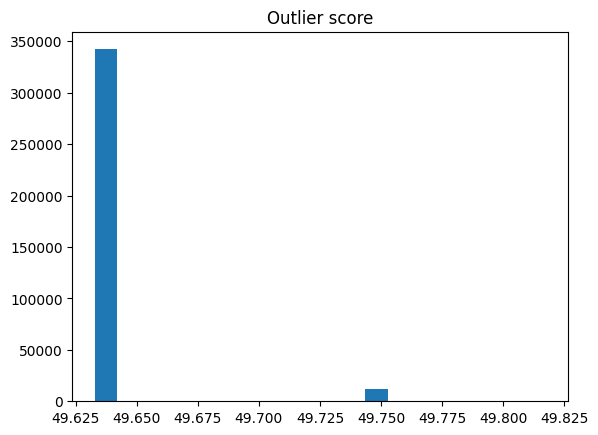

In [60]:
plt.hist(y_train_scores, bins='auto') # arguments are passed to np.histogram
plt.title("Outlier score")
plt.show()

It looks like 49.73 might be a better threshold in this case rather than the 49.63 that come out from the model. 

In [61]:
def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df.columns = selected_columns
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

In [62]:
threshold = 49.73

descriptive_stat_threshold(X_train,y_train_scores, threshold)

,Group,Count,Count %,agency_merchant_avg_ratio_amount,agency_merchant_median_ratio_amount,agency_merchant_month_avg_ratio_amount,agency_merchant_month_median_ratio_amount,agency_merchant_day_avg_ratio_amount,agency_vendor_avg_ratio_amount,agency_vendor_median_ratio_amount,agency_vendor_month_avg_ratio_amount,agency_vendor_month_median_ratio_amount,agency_vendor_day_avg_ratio_amount,agency_merchant_cardholder_avg_ratio_amount,agency_merchant_cardholder_median_ratio_amount,agency_merchant_cardholder_month_avg_ratio_amount,agency_merchant_cardholder_month_median_ratio_amount,agency_merchant_cardholder_day_avg_ratio_amount,Anomaly_Score
0,Normal,342246,96.688948,1.060000,4.210000,"89,398,648,833.910004",4.320000,"9,157,152,123,595.769531","453,377,907,327.419983",1.940000,"-119,332,709,206.369995",1.930000,1.110000,"18,123,609,395,526.140625",65.880000,"-47,149,674,142.500000",0.990000,"9,113,285,514,284.570312",49.630000
1,Outlier,11720,3.311052,-0.820000,-1.220000,"-2,610,608,359,083.600098",-0.770000,"-335,792,442,224,942.000000","-5,774,394,902,717.969727",-1.150000,"14,087,021,472,075.300781",-0.800000,-2.550000,"-603,268,423,438,813.500000",-1.240000,"10,950,999,160,613.060547",3.530000,"-334,511,454,889,591.812500",49.750000


So, it looks like the model are usually identify those negative ratio as outliner in this case. Yes, those transaction that cost much less than the average amount are also kind of outlier. But in this assignemtn, the purpose is to detect the anomaly of those records that might abuse the agency's credit card. So, we want detect those records that have larger ratio to average amount. 

I went back to look at the data at my EDA assignment 2, it indeed has a lot of negative ratio data for every 15 features. Therefore, I decide to normalize the whole dataset into the scale of 0 and 1. So, in that case, the model will not identify those negative value and focus on those data might have a larger value, which match the purpose of this assignment. 

In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(final_df), columns=final_df.columns)
normalized_df.head()

,agency_merchant_avg_ratio_amount,agency_merchant_median_ratio_amount,agency_merchant_month_avg_ratio_amount,agency_merchant_month_median_ratio_amount,agency_merchant_day_avg_ratio_amount,agency_vendor_avg_ratio_amount,agency_vendor_median_ratio_amount,agency_vendor_month_avg_ratio_amount,agency_vendor_month_median_ratio_amount,agency_vendor_day_avg_ratio_amount,agency_merchant_cardholder_avg_ratio_amount,agency_merchant_cardholder_median_ratio_amount,agency_merchant_cardholder_month_avg_ratio_amount,agency_merchant_cardholder_month_median_ratio_amount,agency_merchant_cardholder_day_avg_ratio_amount
0,0.500380,0.001903,0.444444,0.047200,0.500000,0.519454,0.049644,0.500718,0.031974,0.537949,0.500000,0.000034,0.500718,0.712124,0.500000
1,0.500178,0.001899,0.444444,0.047197,0.500000,0.519454,0.049679,0.500718,0.031975,0.537949,0.500000,0.000034,0.500718,0.712124,0.500000
2,0.500077,0.001898,0.444444,0.047197,0.500000,0.519454,0.050011,0.500718,0.031974,0.537949,0.500000,0.000035,0.500718,0.712124,0.500000
3,0.500294,0.001902,0.444444,0.047201,0.500000,0.519454,0.049745,0.500718,0.032000,0.537949,0.500000,0.000035,0.500718,0.712124,0.500000
4,0.500085,0.001898,0.444444,0.047198,0.500000,0.519454,0.049671,0.500718,0.031975,0.537949,0.500000,0.000035,0.500718,0.712127,0.500000


In [64]:
X_normalized_train, X_normalized_test = train_test_split(normalized_df, test_size=0.2, random_state=14)

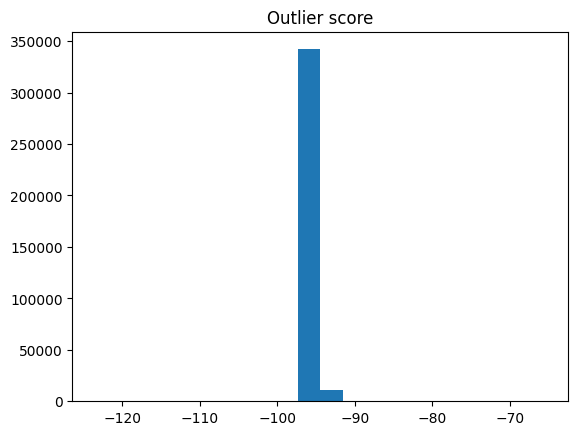

In [65]:
n_bins = 50
hbos = HBOS(n_bins=n_bins,contamination=0.05)
hbos.fit(X_normalized_train)

y_normalized_train_scores = hbos.decision_function(X_normalized_train)
y_normalized_train_pred = hbos.predict(X_normalized_train)

# Test data
y_normalized_test_scores = hbos.decision_function(X_normalized_test)
y_normalized_test_pred = hbos.predict(X_normalized_test)

plt.hist(y_normalized_train_scores, bins='auto') # arguments are passed to np.histogram
plt.title("Outlier score")
plt.show()

In [66]:
threshold = -95

descriptive_stat_threshold(X_normalized_train,y_normalized_train_scores, threshold)

,Group,Count,Count %,agency_merchant_avg_ratio_amount,agency_merchant_median_ratio_amount,agency_merchant_month_avg_ratio_amount,agency_merchant_month_median_ratio_amount,agency_merchant_day_avg_ratio_amount,agency_vendor_avg_ratio_amount,agency_vendor_median_ratio_amount,agency_vendor_month_avg_ratio_amount,agency_vendor_month_median_ratio_amount,agency_vendor_day_avg_ratio_amount,agency_merchant_cardholder_avg_ratio_amount,agency_merchant_cardholder_median_ratio_amount,agency_merchant_cardholder_month_avg_ratio_amount,agency_merchant_cardholder_month_median_ratio_amount,agency_merchant_cardholder_day_avg_ratio_amount,Anomaly_Score
0,Normal,335992,94.922111,0.500000,0.000000,0.440000,0.050000,0.500000,0.520000,0.050000,0.500000,0.030000,0.540000,0.500000,0.000000,0.500000,0.710000,0.500000,-97.070000
1,Outlier,17974,5.077889,0.500000,0.000000,0.440000,0.050000,0.500000,0.520000,0.050000,0.500000,0.030000,0.540000,0.500000,0.000000,0.500000,0.710000,0.500000,-92.920000


In here, it is pointless to look at the statistic of the normalized model. Instead, we can use the prediction result to combine with the orginal dataset that have not be normalized and then group by to see the summary statistic of the normal and abnormal groups. 

In [67]:
descriptive_stat_threshold(X_train,y_normalized_train_scores, threshold)

,Group,Count,Count %,agency_merchant_avg_ratio_amount,agency_merchant_median_ratio_amount,agency_merchant_month_avg_ratio_amount,agency_merchant_month_median_ratio_amount,agency_merchant_day_avg_ratio_amount,agency_vendor_avg_ratio_amount,agency_vendor_median_ratio_amount,agency_vendor_month_avg_ratio_amount,agency_vendor_month_median_ratio_amount,agency_vendor_day_avg_ratio_amount,agency_merchant_cardholder_avg_ratio_amount,agency_merchant_cardholder_median_ratio_amount,agency_merchant_cardholder_month_avg_ratio_amount,agency_merchant_cardholder_month_median_ratio_amount,agency_merchant_cardholder_day_avg_ratio_amount,Anomaly_Score
0,Normal,335992,94.922111,0.960000,2.480000,0.970000,2.350000,"9,387,615,041,500.009766","431,961,282.350000",1.540000,0.890000,1.380000,0.910000,"18,911,809,258,991.218750",1.720000,"79,934,653,289.800003",1.400000,"9,455,488,986,752.000000",-97.070000
1,Outlier,17974,5.077889,1.690000,33.110000,1.400000,37.700000,"-220,076,348,626,228.562500","4,859,560,002,010.940430",7.500000,"6,913,249,652,686.129883",10.310000,2.460000,"-401,790,904,532,582.187500","1,221.350000","4,748,610,145,636.179688",-4.840000,"-221,345,131,457,714.187500",-92.920000


Take a look of the new summary statistic of the model get from the normalized dataset, we can see this time the model become able to detect those higher ratio as anomaly at this case. It is great to see this method work, but we can still see that model are still detect negative ratio in some feature columns. So, we may consider to delete those columns from the dataset since it might be not a suitable feature for the HBOS model in this case. 

Columns that have negative ratio in the ourliner group:
- feature 5: 'agency_merchant_day_avg_ratio_amount'
- feature 11: 'agency_merchant_cardholder_avg_ratio_amount'
- feature 14: 'agency_merchant_cardholder_month_median_ratio_amount'
- feature 15: 'agency_merchant_cardholder_day_avg_ratio_amount'

### Achieve Model Stability by Aggregating Multiple Models

To achieve a robust model with stable outcomes, it is better for us to experiment with a range of bin widths. By building multiple HBOS models with varying bin widths, we can generate a set of outlier scores that better reflect the underlying data structure. Aggregating these scores across different models helps mitigate the risk of overfitting and enhances prediction accuracy.

In [68]:
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer

# Test a range of binning
k_list = [5, 10, 15, 20, 25, 30, 50, 60, 75, 100]
n_clf = len(k_list)
# Just prepare data frames so we can store the model results
normalized_train_scores = np.zeros([X_normalized_train.shape[0], n_clf])
normalized_test_scores = np.zeros([X_normalized_test.shape[0], n_clf])

# Modeling
for i in range(n_clf):
    k = k_list[i]
    hbos = HBOS(n_bins=k)
    hbos.fit(X_normalized_train)
    # Store the results in each column:
    normalized_train_scores[:, i] = hbos.decision_function(X_normalized_train)
    normalized_test_scores[:, i] = hbos.decision_function(X_normalized_test)
# Decision scores have to be normalized before combination
train_scores_norm, test_scores_norm = standardizer(normalized_train_scores,normalized_test_scores)

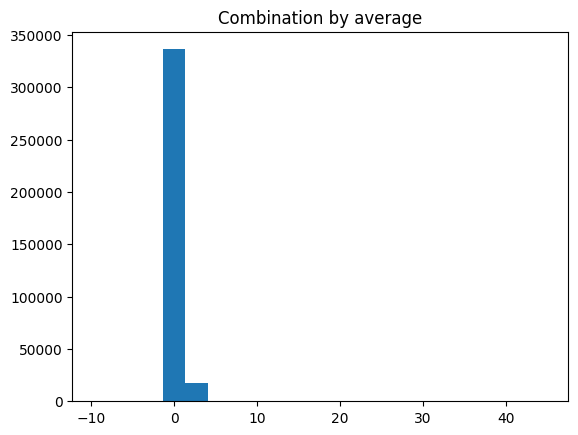

In [69]:
# Combination by average
y_train_by_average = average(train_scores_norm)
y_test_by_average = average(test_scores_norm)

plt.hist(y_train_by_average, bins='auto') # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

In [70]:
threshold = 1.5
descriptive_stat_threshold(X_train,y_train_by_average, threshold)

,Group,Count,Count %,agency_merchant_avg_ratio_amount,agency_merchant_median_ratio_amount,agency_merchant_month_avg_ratio_amount,agency_merchant_month_median_ratio_amount,agency_merchant_day_avg_ratio_amount,agency_vendor_avg_ratio_amount,agency_vendor_median_ratio_amount,agency_vendor_month_avg_ratio_amount,agency_vendor_month_median_ratio_amount,agency_vendor_day_avg_ratio_amount,agency_merchant_cardholder_avg_ratio_amount,agency_merchant_cardholder_median_ratio_amount,agency_merchant_cardholder_month_avg_ratio_amount,agency_merchant_cardholder_month_median_ratio_amount,agency_merchant_cardholder_day_avg_ratio_amount,Anomaly_Score
0,Normal,336319,95.014493,0.950000,2.390000,0.970000,2.280000,0.980000,"431,541,290.200000",1.510000,0.890000,1.370000,0.930000,"4,019,872,495.630000",1.710000,"3,588,331,206.350000",1.400000,1.020000,-0.130000
1,Outlier,17647,4.985507,2.040000,35.260000,1.530000,39.850000,"-45,417,846,499,942.906250","4,949,607,949,008.040039",8.220000,"7,041,352,595,760.219727",10.630000,2.170000,"-49,239,250,921,942.046875","1,244.170000","6,290,139,900,426.419922",-5.100000,"-45,417,846,499,944.539062",2.450000


### 2. ECOD

After building the model with HBOS method, we can use another method called Empirical Cumulative Distribution Function (ECDF) to detect the outliner. The ECDF and HBOS often used together. The ECDF can be used to define an outlier score by measuring how extreme a given data point is relative to the overall distribution of data. The further a point is away from the central mass of data, the more likely it is an outlier.

In [71]:
from pyod.models.ecod import ECOD
ecod = ECOD(contamination=0.05)
ecod.fit(X_train)

ECOD(contamination=0.05, n_jobs=1)

In [72]:
# Training data
y_train_scores = ecod.decision_function(X_train)
y_train_pred = ecod.predict(X_train)

# Test data
y_test_scores = ecod.decision_function(X_test)
y_test_pred = ecod.predict(X_test)

In [73]:
print("The threshold for the defined contamination rate:" , ecod.threshold_)
print("The training data:", count_stat(y_train_pred))
print("The testing data:", count_stat(y_test_pred))

The threshold for the defined contamination rate: 49.750347985761685
The training data: {0: 336267, 1: 17699}
The testing data: {0: 84213, 1: 4279}


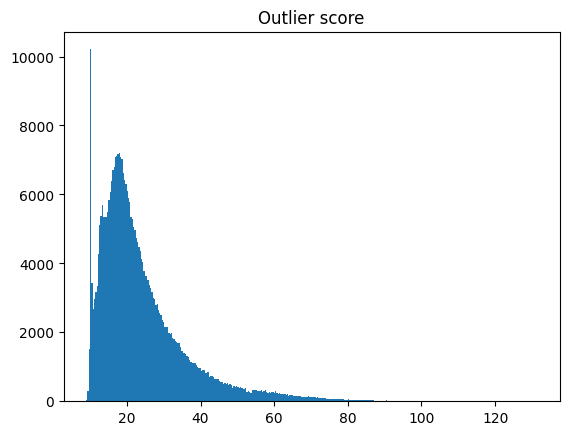

In [74]:
plt.hist(y_train_scores, bins='auto') # arguments are passed to np.histogram
plt.title("Outlier score")
plt.show()

In [103]:
ecod.threshold_

27.355909320485743

In [75]:
threshold = ecod.threshold_
descriptive_stat_threshold(X_train,y_train_scores, threshold)

,Group,Count,Count %,agency_merchant_avg_ratio_amount,agency_merchant_median_ratio_amount,agency_merchant_month_avg_ratio_amount,agency_merchant_month_median_ratio_amount,agency_merchant_day_avg_ratio_amount,agency_vendor_avg_ratio_amount,agency_vendor_median_ratio_amount,agency_vendor_month_avg_ratio_amount,agency_vendor_month_median_ratio_amount,agency_vendor_day_avg_ratio_amount,agency_merchant_cardholder_avg_ratio_amount,agency_merchant_cardholder_median_ratio_amount,agency_merchant_cardholder_month_avg_ratio_amount,agency_merchant_cardholder_month_median_ratio_amount,agency_merchant_cardholder_day_avg_ratio_amount,Anomaly_Score
0,Normal,336267,94.999802,0.890000,2.160000,0.910000,1.960000,0.920000,0.930000,1.540000,0.880000,1.390000,1.010000,"307,112,388,609.590027",1.570000,"76,641,028,908.449997",1.010000,"152,285,958,816.339996",22.200000
1,Outlier,17699,5.000198,3.120000,39.630000,2.650000,45.710000,"-45,284,407,999,574.640625","4,943,266,117,351.929688",7.560000,"7,020,664,967,364.490234",10.240000,0.490000,"-54,853,091,310,369.820312","1,243.220000","4,883,726,420,580.610352",2.450000,"-48,177,720,758,091.992188",62.440000


Looks like the results from the ECOD model is helpful. The model can detect those rows have much larger ratio amount to the benchmark for most of the columns. 

Columns that have negative ratio in the ourliner group:
- feature 5: 'agency_merchant_day_avg_ratio_amount'
- feature 11: 'agency_merchant_cardholder_avg_ratio_amount'
- feature 15: 'agency_merchant_cardholder_day_avg_ratio_amount'

### 3. Combine the HBOS and ECOD results together

Based on the results from the HBOS and ECOD, I want to try experiement of making some adjustments for the feature that put into the model. First of all, I find out both of the model did a slightly bad job on detect the positive ratio for the logic 3, which is to group by the agency and cardholder. So, I decide to just delete this logic from the data. I also take out the feature that group by the day of week, feature 5('agency_merchant_day_avg_ratio_amount') and feature 10('agency_vendor_day_avg_ratio_amount') since the model are more likely to detect those have less ratio in the outliner group. 

In [76]:
selected_columns = ['agency_merchant_avg_ratio_amount',
       'agency_merchant_median_ratio_amount',
       'agency_merchant_month_avg_ratio_amount',
       'agency_merchant_month_median_ratio_amount',
       'agency_vendor_avg_ratio_amount', 
       'agency_vendor_median_ratio_amount',
       'agency_vendor_month_avg_ratio_amount',
       'agency_vendor_month_median_ratio_amount'
                   ]

X_normalized_train2 = X_normalized_train[selected_columns]
X_normalized_test2 = X_normalized_test[selected_columns]
X_train2 = X_train[selected_columns]
X_test2 = X_test[selected_columns]

In [77]:
########
# HBOS #
########
n_bins = 50
hbos = HBOS(n_bins=n_bins,contamination=0.05)
hbos.fit(X_normalized_train2)

y_train_hbos_pred = hbos.labels_
y_test_hbos_pred = hbos.predict(X_normalized_test2)
y_train_hbos_scores = hbos.decision_function(X_normalized_train2)
y_test_hbos_scores = hbos.decision_function(X_normalized_test2)

########
# ECOD #
########
clf_name = 'ECOD'
ecod = ECOD(contamination=0.05)
ecod.fit(X_train2)
y_train_ecod_pred = ecod.labels_
y_test_ecod_pred = ecod.predict(X_test2)
y_train_ecod_scores = ecod.decision_scores_  # raw outlier scores
y_test_ecod_scores = ecod.decision_function(X_test2)

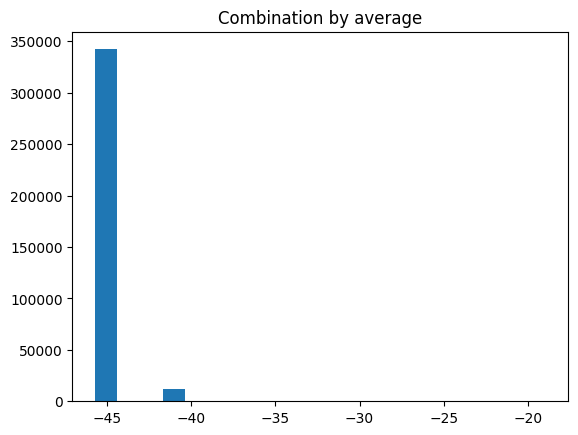

In [100]:
plt.hist(y_train_hbos_scores, bins='auto') # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

In [102]:
threshold = -43
descriptive_stat_threshold(X_train2,y_train_hbos_scores, threshold)

,Group,Count,Count %,agency_merchant_avg_ratio_amount,agency_merchant_median_ratio_amount,agency_merchant_month_avg_ratio_amount,agency_merchant_month_median_ratio_amount,agency_vendor_avg_ratio_amount,agency_vendor_median_ratio_amount,agency_vendor_month_avg_ratio_amount,agency_vendor_month_median_ratio_amount,Anomaly_Score
0,Normal,342127,96.655328,1.060000,2.750000,1.050000,2.620000,"424,215,379.740000",1.830000,0.980000,1.660000,-45.730000
1,Outlier,11839,3.344672,-0.610000,41.020000,-0.730000,48.230000,"7,377,796,391,257.790039",2.010000,"10,495,713,257,652.310547",6.930000,-40.840000


In [79]:
threshold = ecod.threshold_
descriptive_stat_threshold(X_train2,y_train_ecod_scores, threshold)

,Group,Count,Count %,agency_merchant_avg_ratio_amount,agency_merchant_median_ratio_amount,agency_merchant_month_avg_ratio_amount,agency_merchant_month_median_ratio_amount,agency_vendor_avg_ratio_amount,agency_vendor_median_ratio_amount,agency_vendor_month_avg_ratio_amount,agency_vendor_month_median_ratio_amount,Anomaly_Score
0,Normal,336267,94.999802,0.870000,2.070000,0.890000,1.860000,0.910000,1.490000,"48,821,406,849.150002",1.360000,11.820000
1,Outlier,17699,5.000198,3.590000,41.370000,2.900000,47.650000,"4,943,266,117,352.299805",8.550000,"6,093,096,855,231.259766",10.920000,34.630000


The new models using 8 selected features seems like work well even though the model will detect some of negative ratio in the outlier group. Now, we can combine the results of these two models and take a further look the outlier. 

In [80]:
# Put the actual, the HBO score and the ECOD score together
Actual_pred = pd.DataFrame({'HBOS_pred': y_test_hbos_pred, 'ECOD_pred': y_test_ecod_pred})
Actual_pred.head()
pd.crosstab(Actual_pred['HBOS_pred'],Actual_pred['ECOD_pred'])

ECOD_pred,0,1
HBOS_pred,,
0,83612,1982
1,583,2315


When we combine the results of the HBOS and the ECOD predictions, 2315 observations are identified by both models to be outliers, which can be suspicous for us to take more careful look. At the same time, there are also 583 observations are identified as outlier by HBOS model and 1982 observations are identified as outlier by ECOD model. 

In [86]:
X_test2['HBOS_Anomaly_Score'] = y_test_hbos_scores
X_test2['HBOS_Group'] = np.where(X_test2['HBOS_Anomaly_Score']< -43, 'Normal', 'Outlier')

X_test2['ECOD_Anomaly_Score'] = y_test_ecod_scores
X_test2['ECOD_Group'] = np.where(X_test2['ECOD_Anomaly_Score']< ecod.threshold_, 'Normal', 'Outlier')

X_test2 = X_test2.drop(columns=['HBOS_Anomaly_Score', 'ECOD_Anomaly_Score'])

In [94]:
Normal = X_test2[(X_test2['HBOS_Group'] != 'Outlier') & (X_test2['ECOD_Group'] != 'Outlier')]
Outlier = X_test2[(X_test2['HBOS_Group'] == 'Outlier') | (X_test2['ECOD_Group'] == 'Outlier')]

After creating the label that indicate the outlier, we can make a separate dataset for those rows that are identified as outlier at least one time by the two model.

In [95]:
Outlier.describe()

,agency_merchant_avg_ratio_amount,agency_merchant_median_ratio_amount,agency_merchant_month_avg_ratio_amount,agency_merchant_month_median_ratio_amount,agency_vendor_avg_ratio_amount,agency_vendor_median_ratio_amount,agency_vendor_month_avg_ratio_amount,agency_vendor_month_median_ratio_amount
count,"4,880.000000","4,880.000000","4,880.000000","4,880.000000","4,880.000000","4,880.000000","4,880.000000","4,880.000000"
mean,2.917483,120.602660,3.119538,119.719039,"-17,928,456,354,705.355469",7.562880,"-25,462,858,454,368.628906",7.309543
std,8.729845,"7,559.970403",33.750920,"7,487.347492","1,225,539,440,389,086.250000",32.006266,"1,306,165,395,014,299.000000",28.274306
min,-81.000000,-231.182941,-123.295989,-319.816667,"-69,445,506,254,053,048.000000",-198.392226,"-69,445,506,254,053,048.000000",-186.653082
25%,-0.406820,-0.795568,-0.395717,-0.789626,-0.268657,-0.489060,-0.187595,-0.270426
50%,-0.038327,-0.083503,-0.023707,-0.047849,0.000000,0.000000,1.000000,1.000000
75%,5.021956,13.984581,5.013207,13.622581,4.673306,11.574023,3.958200,9.933416
max,194.475650,"528,116.052705","2,277.000000","523,038.013736","31,585,186,746,004,928.000000","1,177.500000","18,877,119,313,100,148.000000",759.000000


In [96]:
pd.options.display.float_format = '{:,.6f}'.format

Outlier_statistic = Outlier.describe()
Outlier_mean = Outlier_statistic.loc['mean']

Normal_statistic = Normal.describe()
Normal_mean = Normal_statistic.loc['mean']

mean_comparison = pd.DataFrame({
    'Outlier Mean': Outlier_mean,
    'Normal Mean': Normal_mean})
mean_comparison

,Outlier Mean,Normal Mean
agency_merchant_avg_ratio_amount,2.917483,0.880316
agency_merchant_median_ratio_amount,120.602660,2.097277
agency_merchant_month_avg_ratio_amount,3.119538,0.900530
agency_merchant_month_median_ratio_amount,119.719039,1.960388
agency_vendor_avg_ratio_amount,"-17,928,456,354,705.355469",0.917165
agency_vendor_median_ratio_amount,7.562880,1.448726
agency_vendor_month_avg_ratio_amount,"-25,462,858,454,368.628906",0.942072
agency_vendor_month_median_ratio_amount,7.309543,1.318114


Looks like the model have a solid result. We can find out that the 8 features mean value in outlier group is much higher than the mean value in normal group, and this result now make those records in outlier seems really suspicious. 